In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd

from time import process_time
from HSDM_fpt import ie_bessel_fpt
from HSDM_fpt import series_bessel_fpt

import matplotlib.pyplot as plt

In [2]:
def cal_time_series(dim, rep=20):
    series_comp_time = {'25':[],
                        '50':[],
                        '75':[],
                        '100':[]}
    
    for N in [25, 50, 75, 100]:
        for _ in range(rep):
            time_start = process_time()
            series_bessel_fpt(np.arange(0.001, 5, 0.1), a=2, sigma=1, nu=(dim-2)/2, n=N)
            time_elapsed = (process_time() - time_start)
            series_comp_time[str(N)].append(time_elapsed)

    return pd.DataFrame(series_comp_time)
    

In [3]:
def cal_time_ie(dim, rep=20):
    ie_comp_time = {'0.2':[],
                    '0.15':[],
                    '0.1':[],
                    '0.05':[]}
    
    for dt in [0.2, 0.15, 0.1, 0.05]:
        for _ in range(rep):
            time_start = process_time()
            ie_bessel_fpt(lambda t: 4, lambda t:0, dim, 0.0001, sigma=2, dt=dt, T_max=5)
            time_elapsed = (process_time() - time_start)
            ie_comp_time[str(dt)].append(time_elapsed)

    return pd.DataFrame(ie_comp_time)

# Computational time

In [4]:
series_comp_time_2D = cal_time_series(2, rep=50)
series_comp_time_3D = cal_time_series(3, rep=50)
series_comp_time_4D = cal_time_series(4, rep=50)

In [5]:
ie_comp_time_2D = cal_time_ie(2, rep=50)
ie_comp_time_3D = cal_time_ie(3, rep=50)
ie_comp_time_4D = cal_time_ie(4, rep=50)

# plot

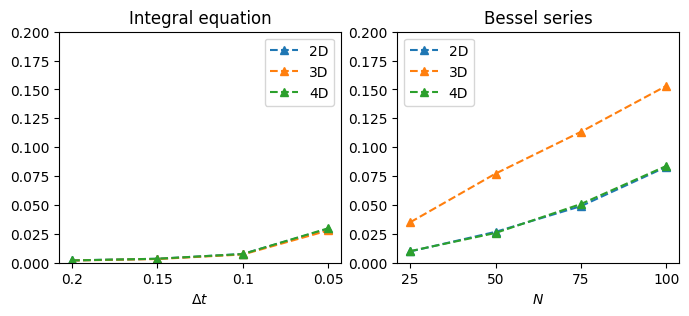

In [6]:
plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.ylim(0, 0.2)
plt.plot(ie_comp_time_2D.mean().index,
         ie_comp_time_2D.mean().values, '--^', label='2D')
plt.plot(ie_comp_time_3D.mean().index,
         ie_comp_time_3D.mean().values, '--^', label='3D')
plt.plot(ie_comp_time_4D.mean().index,
         ie_comp_time_4D.mean().values, '--^', label='4D')
plt.title('Integral equation')
plt.xlabel(r'$\Delta t$')
plt.legend();

plt.subplot(122)
plt.ylim(0, 0.2)
plt.plot(series_comp_time_2D.mean().index,
         series_comp_time_2D.mean().values, '--^', label='2D')
plt.plot(series_comp_time_3D.mean().index,
         series_comp_time_3D.mean().values, '--^', label='3D')
plt.plot(series_comp_time_4D.mean().index,
         series_comp_time_4D.mean().values, '--^', label='4D');
plt.title('Bessel series')
plt.xlabel(r'$N$');

plt.legend();
plt.savefig('../_01_Figures/comp_time.pdf', 
            transparent=True, 
            dpi=600, 
            bbox_inches='tight');